# yolo labeling

In [17]:
from bs4 import BeautifulSoup
path = r"D:\ex\0617_01.xml"
with open(path, "r", encoding="utf-8") as f:
    soup = BeautifulSoup(f, "xml")

In [18]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np
import cv2
image_path = r"D:\ex\MP_SEL_000001.jpg"
image_pil = Image.open(image_path)
image = np.array(image_pil)

In [3]:
box_tags = soup.find_all('image')
image_width = image.shape[1]
image_height = image.shape[0]
txts= []
for box in box_tags[0].find_all('box'):
    label = box['label']
    xbr = box['xbr']
    xtl = box['xtl']
    ybr = box['ybr']
    ytl = box['ytl']
    x_center = (float(box['xbr']) + float(box['xtl'])) / 2.0
    y_center = (float(box['ybr']) + float(box['ytl'])) / 2.0
    width = float(box['xbr']) - float(box['xtl'])
    height = float(box['ybr']) - float(box['ytl'])
    x_center /= image_width
    y_center /= image_height
    width /= image_width
    height /= image_height  
    txts.append([label,x_center,y_center,width, height])

In [7]:
with open("D:/ex/"+box_tags[0]['name'][:-3]+'txt', 'w') as t:
    for txt in txts:
        t.write(' '.join(map(str, txt)) + '\n')

# drawing box

In [5]:
with open('yolo.txt', 'r') as f:
    data = f.readlines()
    labs = [i.strip() for i in data]
    

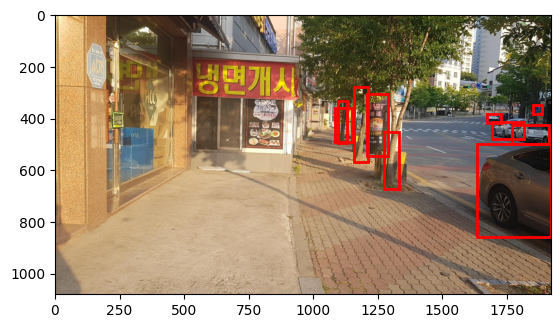

In [6]:
for line in labs:
    parts = line.split()
    label = parts[0]
    x_center, y_center, width, height = map(float, parts[1:])
    
    x1 = (x_center - width/2) * image.shape[1]
    y1 = (y_center - height/2) * image.shape[0]
    x2 = (x_center + width/2) * image.shape[1]
    y2 = (y_center + height/2) * image.shape[0]

    plt.gca().add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor='red', linewidth=2))
    # plt.text(x1, y1 - 5, label, color='red', fontsize=5, backgroundcolor='black')

plt.imshow(image)

# folder labeling

In [25]:
import os
from bs4 import BeautifulSoup
path = r'D:\인도보행 영상\바운딩박스\Bbox_1_new'
datalist = os.listdir(path)

In [26]:
key_values = [
    'barricade',
    'bench',
    'bicycle',
    'bollard',
    'bus',
    'car',
    'carrier',
    'cat',
    'chair',
    'dog',
    'fire_hydrant',
    'kiosk',
    'motorcycle',
    'movable_signage',
    'parking_meter',
    'person',
    'pole',
    'potted_plant',
    'scooter',
    'stop',
    'stroller',
    'table',
    'traffic_light',
    'traffic_sign',
    'tree_trunk',
    'truck',
    'wheelchair'
]

class_dic = {i: key_values[i] for i in range(27)}



In [45]:
# def maketxt(path):
#     global data_class
#     with open(path, "r", encoding="utf-8") as f:
#         soup = BeautifulSoup(f, "xml")
#     box_tags = soup.find_all('image')
#     image_width = 1920
#     image_height = 1080
#     for i in range(len(box_tags)):
#         # txts= []
#         for box in box_tags[i].find_all('box'):
#             label = box['label']
#             xbr = box['xbr']
#             xtl = box['xtl']
#             ybr = box['ybr']
#             ytl = box['ytl']
#             x_center = (float(box['xbr']) + float(box['xtl'])) / 2.0
#             y_center = (float(box['ybr']) + float(box['ytl'])) / 2.0
#             width = float(box['xbr']) - float(box['xtl'])
#             height = float(box['ybr']) - float(box['ytl'])
#             x_center /= image_width
#             y_center /= image_height
#             width /= image_width
#             height /= image_height  
#             txts.append([label,x_center,y_center,width, height])
#             data_class.add(label)
#         with open("D:/ex/data/train/labels/"+box_tags[i]['name'][:-3]+'txt', 'w') as t:
#             for txt in txts:
#                 t.write(' '.join(map(str, txt)) + '\n')

In [30]:
def maketxt(path):
    with open(path, "r", encoding="utf-8") as f:
        soup = BeautifulSoup(f, "xml")
    box_tags = soup.find_all('image')
    image_width = 1920
    image_height = 1080
    for i in range(len(box_tags)):
        txts= []
        for box in box_tags[i].find_all('box'):
            label = box['label']
            xbr = box['xbr']
            xtl = box['xtl']
            ybr = box['ybr']
            ytl = box['ytl']
            x_center = (float(box['xbr']) + float(box['xtl'])) / 2.0
            y_center = (float(box['ybr']) + float(box['ytl'])) / 2.0
            width = float(box['xbr']) - float(box['xtl'])
            height = float(box['ybr']) - float(box['ytl'])
            x_center /= image_width
            y_center /= image_height
            width /= image_width
            height /= image_height
            data_class.add(label)  
            for key, value in class_dic.items():
                if value == label:
                    txts.append([key,x_center,y_center,width, height])
        with open("D:\\ex\\data\\train\\labels\\"+box_tags[i]['name'][:-3]+'txt', 'w') as t:
            for txt in txts:
                t.write(' '.join(map(str, txt)) + '\n')

In [31]:
data_class = set()
for i in datalist:
    reallist = os.listdir(path+"\\"+i)
    label_data_path = path+"\\"+i+"\\"+reallist[0]
    maketxt(label_data_path)

In [50]:
data_class

{'barricade',
 'bench',
 'bicycle',
 'bollard',
 'bus',
 'car',
 'carrier',
 'cat',
 'chair',
 'dog',
 'fire_hydrant',
 'kiosk',
 'motorcycle',
 'movable_signage',
 'parking_meter',
 'person',
 'pole',
 'potted_plant',
 'scooter',
 'stop',
 'stroller',
 'table',
 'traffic_light',
 'traffic_sign',
 'tree_trunk',
 'truck',
 'wheelchair'}

In [37]:
import glob
import shutil
for i in range(1,10):
    meta_data_dir = f"D:\\인도보행 영상\\바운딩박스\\Bbox_1_new\\Bbox_000{i}" # 이동할 폴더의 경로를 넣습니다.
    train_data = "D:\\ex\\data\\train\\images" # 이동할 폴더의 경로를 넣습니다.
    jpg_file_list = glob.glob(meta_data_dir + '/*.jpg') # 폴더안의 파일 리스트를 얻습니다.
    jpg_file_list = sorted(jpg_file_list)
    for i in jpg_file_list:
        shutil.copy(i, train_data)

In [38]:
for i in range(10,100):
    meta_data_dir = f"D:\\인도보행 영상\\바운딩박스\\Bbox_1_new\\Bbox_00{i}" # 이동할 폴더의 경로를 넣습니다.
    train_data = "D:\\ex\\data\\train\\images" # 이동할 폴더의 경로를 넣습니다.
    jpg_file_list = glob.glob(meta_data_dir + '/*.jpg') # 폴더안의 파일 리스트를 얻습니다.
    jpg_file_list = sorted(jpg_file_list)
    for i in jpg_file_list:
        shutil.copy(i, train_data)

In [39]:
for i in range(100,151):
    meta_data_dir = f"D:\\인도보행 영상\\바운딩박스\\Bbox_1_new\\Bbox_0{i}" # 이동할 폴더의 경로를 넣습니다.
    train_data = "D:\\ex\\data\\train\\images" # 이동할 폴더의 경로를 넣습니다.
    jpg_file_list = glob.glob(meta_data_dir + '/*.jpg') # 폴더안의 파일 리스트를 얻습니다.
    jpg_file_list = sorted(jpg_file_list)
    for i in jpg_file_list:
        shutil.copy(i, train_data)

# yaml

In [1]:
import yaml

In [18]:
data = {'train' : r"D:\ex\data\train_1\images",
        'val' : r"D:\ex\data\val_1\images",
        'names' : ['barricade','bench','bicycle','bollard', 'bus', 'car', 'carrier', 'cat', 'chair',
                   'dog', 'fire_hydrant', 'kiosk', 'motorcycle', 'movable_signage', 'parking_meter',
                   'person', 'pole', 'potted_plant', 'scooter', 'stop','stroller', 'table', 'traffic_light',
                   'traffic_sign', 'tree_trunk', 'truck', 'wheelchair'],
        'nc' : 27}

with open(r'C:\Users\asiae\yolov8\data.yaml', 'w') as f:
    yaml.dump(data, f)

with open(r'C:\Users\asiae\yolov8\data.yaml', 'r') as f:
    walk_yaml = yaml.safe_load(f)
    display(walk_yaml)


{'names': ['barricade',
  'bench',
  'bicycle',
  'bollard',
  'bus',
  'car',
  'carrier',
  'cat',
  'chair',
  'dog',
  'fire_hydrant',
  'kiosk',
  'motorcycle',
  'movable_signage',
  'parking_meter',
  'person',
  'pole',
  'potted_plant',
  'scooter',
  'stop',
  'stroller',
  'table',
  'traffic_light',
  'traffic_sign',
  'tree_trunk',
  'truck',
  'wheelchair'],
 'nc': 27,
 'train': 'D:\\ex\\data\\train_1\\images',
 'val': 'D:\\ex\\data\\val_1\\images'}

In [19]:
with open(r'C:\Users\asiae\yolov8\data.yaml', 'r') as f:
    walk_yaml = yaml.safe_load(f)
    display(walk_yaml)

{'names': ['barricade',
  'bench',
  'bicycle',
  'bollard',
  'bus',
  'car',
  'carrier',
  'cat',
  'chair',
  'dog',
  'fire_hydrant',
  'kiosk',
  'motorcycle',
  'movable_signage',
  'parking_meter',
  'person',
  'pole',
  'potted_plant',
  'scooter',
  'stop',
  'stroller',
  'table',
  'traffic_light',
  'traffic_sign',
  'tree_trunk',
  'truck',
  'wheelchair'],
 'nc': 27,
 'train': 'D:\\ex\\data\\train_1\\images',
 'val': 'D:\\ex\\data\\val_1\\images'}

In [16]:
len(walk_yaml['names'])

27

In [ ]:
yolo task=detect mode=train model=yolov8s.pt data=data.yaml epochs=100 imgsz=640